In [127]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [128]:
def load_tab_separated_data(filepath):
    with open(filepath, 'r') as f:
        data = [line.strip().split('\t') for line in f if line.strip()]
    data = np.array(data, dtype=float)
    return data

# Ejemplo de uso:
# data = load_tab_separated_data(gyration_file)

In [129]:
#creo que podria automatizar esto, por ahora tengo pocos datos    

carpeta = "/home/tobias/resultados2/resultados"
ionizacion_grade = "N_beads40/Alpha_n0.2"

gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")
energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")


gyration_dat = load_tab_separated_data(gyration_file)
density_dat = load_tab_separated_data(density_file)
energy_dat = load_tab_separated_data(energy_file)

#Beads=[10,20,40]
#ionizacion=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#Beads=[20]
#ionizacion=[0.3,0.4,0.6,0.7,0.8,0.9]

Beads=[40]
ionizacion=[0.0,0.1,0.2,0.3,0.8]


In [130]:
#eje x en density_names[-1] #me importan nomas 1,2,3,5
Density_names = [
    "Cationes",
    "Microion Profile anions",
    "Polimero",
    "Cation Profile",
    "Anion (parte del microgel)",
    "Microgel",
    "r"
]

#eje x en energy_names[0]
energy_names = [
    "tiempo",
    "Total",
    "Cinetica",
    "Bonded",
    "Non-bonded",
    "Coulombina"
]     

line_styles = ["", "--", "-", ":", (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 10))]
mark_styles = ['o', 's', '^', 'D', 'v', 'P', '*']
rainbow_colors = [
    "#124242",  # rojo
    "#3cb44b",  # verde
    "#ff0000",  # amarillo
    "#4363d8",  # azul
    "#f58231",  # naranja
    "#0011ff",  # violeta
    "#46f0f0",  # cian
    "#34a4ff",  # rosa
    "#bcf60c",  # lima
    "#fabebe",  # rosa claro
    "#008080",  # teal
    "#e6beff",  # lila claro
]

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5151/2703051331.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("r [$\sigma$]", fontsize=16)


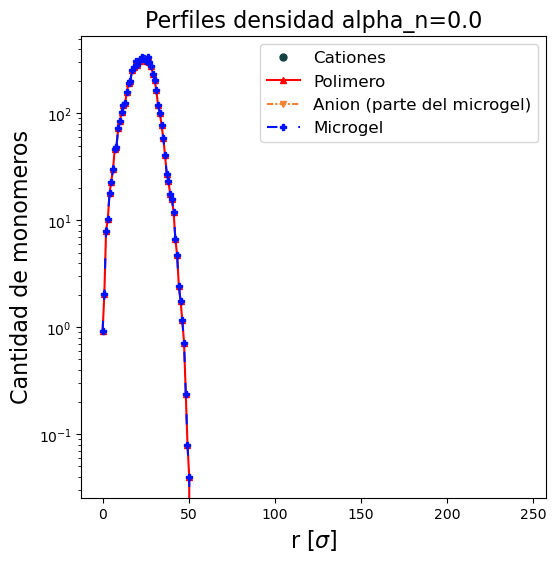

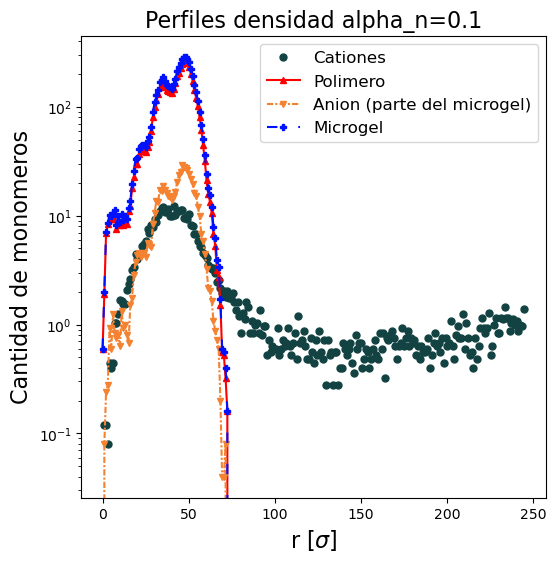

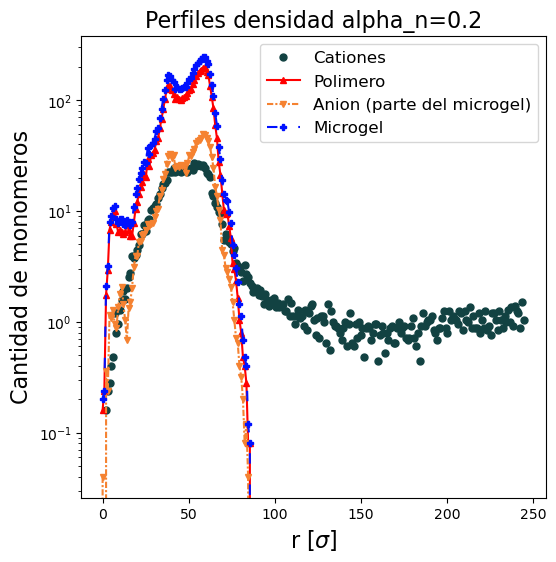

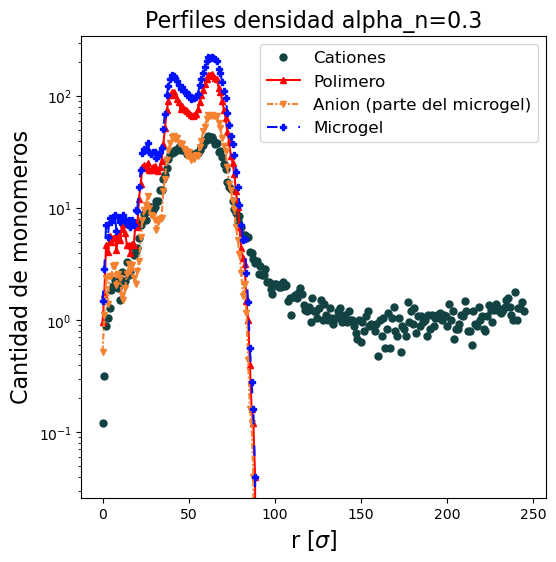

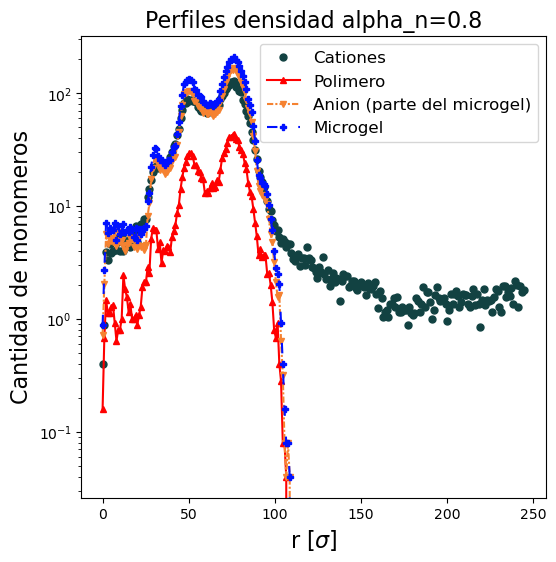

In [132]:
#grafico density profiles
carpeta = "/home/tobias/resultados2/resultados"

Rg_vs_ionº = []

for j in ionizacion:

    density_dat = None
    ionizacion_grade = f"N_beads40/Alpha_n{j}"

    density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")

    density_dat = load_tab_separated_data(density_file)

    plt.figure(figsize=(6, 6))
    for i in [0, 2, 4, 5]:
        plt.plot(density_dat[:, 6], density_dat[:, i], label=Density_names[i],
                linestyle=line_styles[i], marker=mark_styles[i],
                markersize=5, color=rainbow_colors[i])
    plt.title(f"Perfiles densidad alpha_n={j}", fontsize=16)
    plt.legend(fontsize=12)
    plt.yscale("log")
    #plt.xscale("log")
    plt.xlabel("r [$\sigma$]", fontsize=16)
    plt.ylabel("Cantidad de monomeros", fontsize=16)   #creo que es el numero de particulas por unidad de volumen, #normalizar

    plt.show()
    #aumentar tamaño de letra de escalas

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_5151/2622760519.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("Energía [$\epsilon$]", fontsize=16)


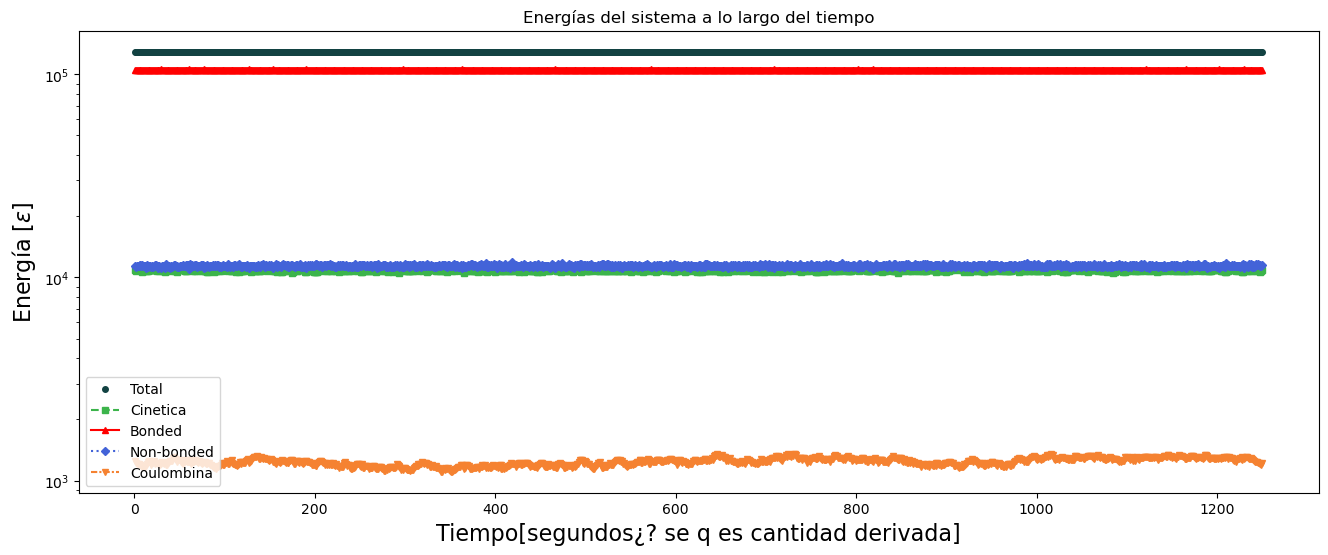

In [ ]:
#grafico energias

energy_dat = load_tab_separated_data(energy_file)

plt.figure(figsize=(16, 6))
for i in range(1, 6):
    plt.plot(energy_dat[:, 0], energy_dat[:, i], label=energy_names[i], linestyle=line_styles[i-1], marker=mark_styles[i-1], markersize=4, color=rainbow_colors[i-1])
plt.xlabel("Tiempo[segundos¿? se q es cantidad derivada]", fontsize=16)
plt.ylabel("Energía [$\epsilon$]", fontsize=16)
#plt.ylim(35000,40000)
#plt.ylim(1000,2000)
plt.yscale("log")
#plt.xscale("log")
plt.title("Energías del sistema a lo largo del tiempo")
plt.legend()

Valor ajustado: 50.8 ± 0.0
sumar todos y dividir por total 50.8
desv 21.1


<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5151/1767061086.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('Tiempo $[\sigma(m/\epsilon)^{1/2}]$', fontsize=16)
/tmp/ipykernel_5151/1767061086.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('R_g [$\sigma$]', fontsize=16)


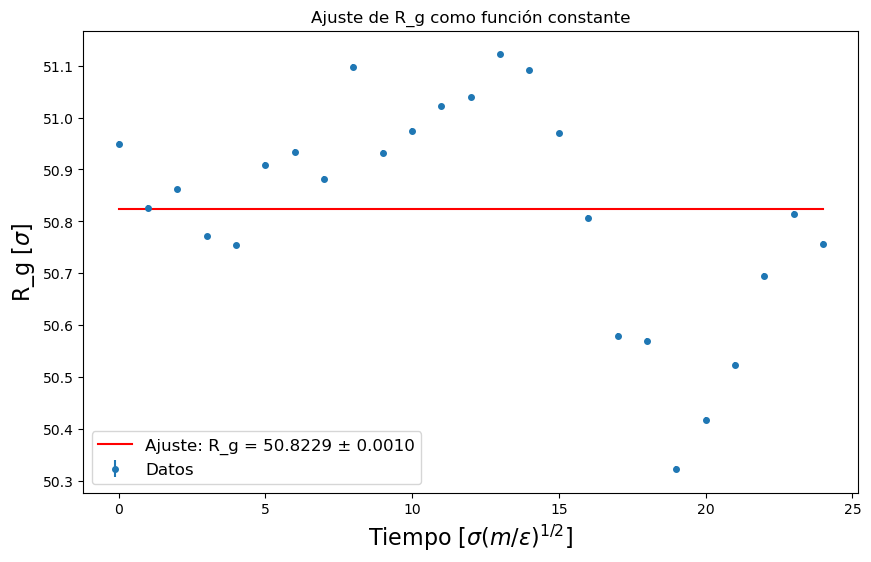

In [ ]:
from scipy.optimize import curve_fit

# Definimos la función constante, para que sea "R_g"
def constante(x, a):
    return a * np.ones_like(x)


y = np.power(gyration_dat[:, 0],1/2)  # eje x (R_g)²
y_err =0.0001*y
x = np.arange(len(y))  # eje y (indices, digamos que seria "t")

# Ajuste
popt, pcov = curve_fit(constante, x, y, sigma=y_err, absolute_sigma=True)
a_fit = popt[0]
a_err = np.sqrt(pcov[0, 0])

print(f"Valor ajustado: {a_fit:.1f} ± {a_err:.1f}")
print(f"sumar todos y dividir por total {np.sqrt(np.mean(gyration_dat[:,0])):.1f}")
print(f"desv {np.std(gyration_dat[:,0]):.1f}")

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='Datos', markersize=4)
plt.plot(x, constante(x, *popt), 'r-', label=f'Ajuste: R_g = {a_fit:.4f} ± {a_err:.4f}')
plt.xlabel('Tiempo $[\sigma(m/\epsilon)^{1/2}]$', fontsize=16)
plt.ylabel('R_g [$\sigma$]', fontsize=16)
plt.title('Ajuste de R_g como función constante')
plt.legend(fontsize=12)
plt.show()
#buscar tl tiempo en espresso<

In [ ]:
#rg/rgo vs ion                          listo                   
#a/ao vs ion                            como caluculo a
#Rg vs n                                listo
#carga neta vs ion                      como calculo la carga neta
#asphericity vs ion #Lz²-1/2(Lx²+Ly²)   listo                           gyration_dat[;,1]
#acillindrity vs ion #Ly²-Lx²           listo                           gyration_dat[;,2]

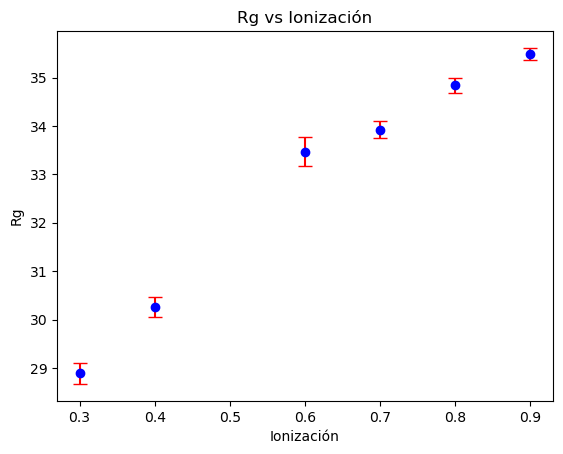

In [ ]:

carpeta = "/home/tobias/resultados2/resultados"

Rg_vs_ionº = []
rgerr = []
for i in ionizacion:
    ionizacion_grade = f"N_beads20/Alpha_n{i}"
    gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")


    gyration_dat = load_tab_separated_data(gyration_file)

    rg2=gyration_dat[:,0]

    sigma_rg2=np.std(rg2)

    Rg_vs_ionº.append(np.sqrt(np.mean(gyration_dat[:, 0])))

    rgerr.append(((1/2)*np.mean(rg2)**(-0.5)*sigma_rg2))

#plt.plot(ionizacion, Rg_vs_ionº, marker='o', linestyle='--', color='b')
plt.errorbar(ionizacion, Rg_vs_ionº, yerr=rgerr, fmt='o', color='b', ecolor='r', capsize=5)
plt.xlabel('Ionización')
plt.ylabel('Rg')
plt.title('Rg vs Ionización')
plt.show()




[np.float64(34.83885187545651), np.float64(66.96353634628326)]


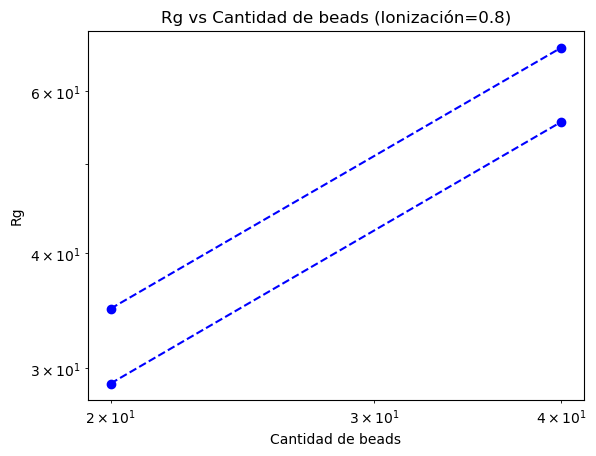

In [ ]:
Beads=[20,40]
ionizacion=[0.3,0.8]
#cambiar grade por degree

for j in ionizacion:  # para cada ionización hacemos un plot del Rg vs beads
    Rg2_vs_Beads = []
    Rg_vs_Beads = []
    for i in Beads:

        ionizacion_grade = f"N_beads{i}/Alpha_n{j}"

        gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")

        gyration_dat = load_tab_separated_data(gyration_file)

        Rg2_vs_Beads.append(np.mean(gyration_dat[:, 0]))

        Rg_vs_Beads.append(np.sqrt(np.mean(gyration_dat[:, 0])))




    plt.loglog(Beads, Rg_vs_Beads, marker="o", linestyle='--', color='b')

x=np.logspace(np.log10(8),np.log10(50),100)
y=0.25*x**(0.588)

plt.xlabel('Cantidad de beads')
plt.ylabel('Rg')


plt.title(f'Rg vs Cantidad de beads (Ionización={j})')
plt.show()
    #plt.savefig(f'Rg_vs_Beads_ion{j}.png') hay q guardar despues cuando veamos q esta todo ok

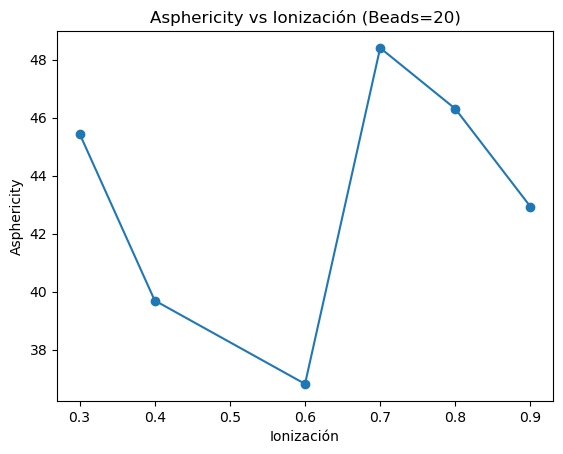

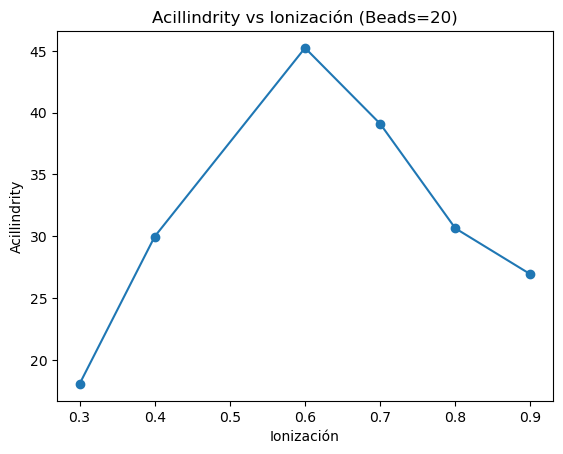

In [ ]:
# Para cada Beads vamos a graficar la asphericity y acillindrity vs ionizacion
Beads=[20]
ionizacion=[0.3,0.4,0.6,0.7,0.8,0.9]

#Beads=[40]
#ionizacion=[0.0,0.1,0.2,0.3,0.8]



for i in Beads:
    asphericity_vs_ion = []
    acillindrity_vs_ion = []
    for j in ionizacion:
        ionizacion_grade = f"N_beads{i}/Alpha_n{j}"
        gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
        density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")
        energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")

        gyration_dat = load_tab_separated_data(gyration_file)
        density_dat = load_tab_separated_data(density_file)
        energy_dat = load_tab_separated_data(energy_file)
        asphericity_vs_ion.append(np.mean(gyration_dat[:, 1]))
        acillindrity_vs_ion.append(np.mean(gyration_dat[:, 2]))
    plt.plot(ionizacion, asphericity_vs_ion, marker='o')
    plt.xlabel('Ionización')
    plt.ylabel('Asphericity')
    plt.title(f'Asphericity vs Ionización (Beads={i})')
    plt.show()
    #plt.savefig(f'Asphericity_vs_ion_Beads{i}.png') hay q guardar despues cuando veamos q esta todo ok
    plt.plot(ionizacion, acillindrity_vs_ion, marker='o')
    plt.xlabel('Ionización')
    plt.ylabel('Acillindrity')
    plt.title(f'Acillindrity vs Ionización (Beads={i})')
    plt.show()
    #plt.savefig(f'Acillindrity_vs_ion_Beads{i}.png') hay q guardar despues cuando veamos q esta todo ok